In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
att = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")
att.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# **Step 2: Data Cleaning, Preprocessing, and Exploration**

In [3]:
att.info() # No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
att.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
att.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
att.duplicated().sum() # No duplicates

np.int64(0)

EDA

In [7]:
att.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
att.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
att["EmployeeCount"].nunique()

1

In [10]:
att["EnvironmentSatisfaction"].nunique()

4

In [11]:
att["StandardHours"].nunique()


1

In [12]:
att["Over18"].nunique()

1

In [13]:
att.drop(columns=["EmployeeNumber", "StandardHours", "Over18", "EmployeeCount"], inplace=True)
# the columns are not relevant

In [14]:
num_cols = att.select_dtypes("number")
num_cols.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2


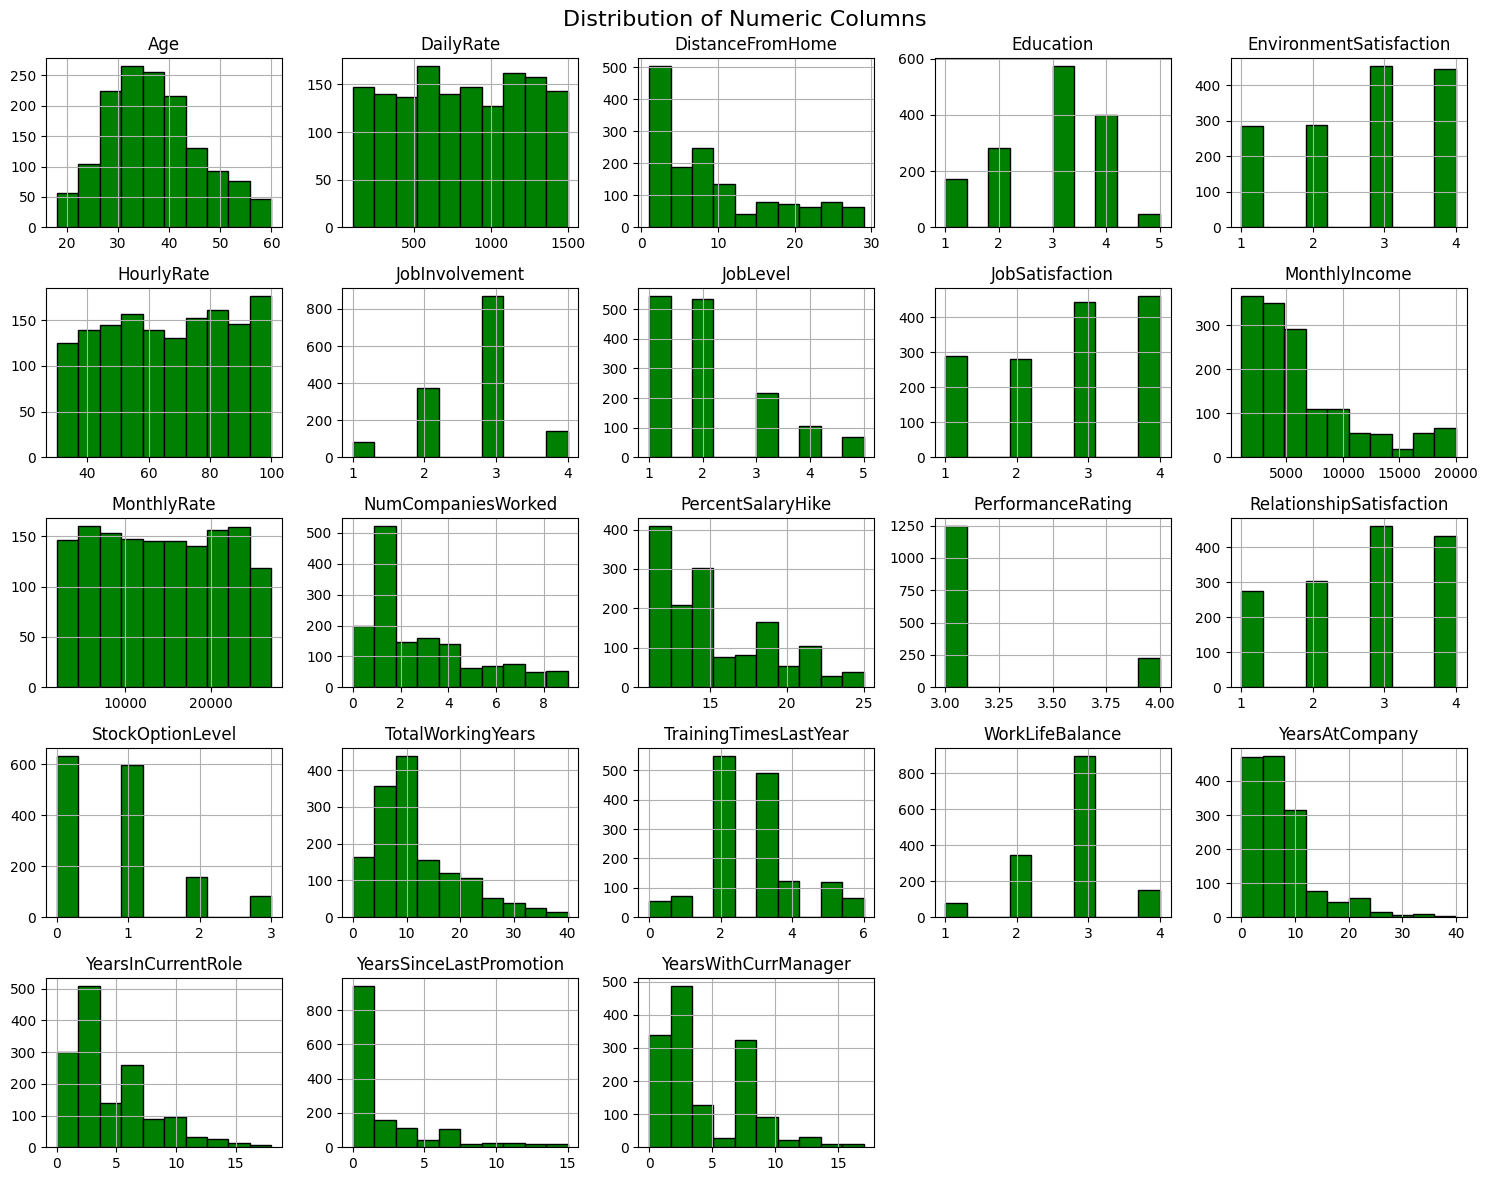

In [15]:
num_cols.hist(figsize=(15, 12), bins=10, color="green", edgecolor="black")
plt.suptitle("Distribution of Numeric Columns", fontsize=16)
plt.tight_layout()
plt.show()


Insights
1. Age Distribution: Most employees are between 30 and 40 years old and the distribution shows a slight right skew which could reflect a younger workforce or potential turnover at older ages.

To explore age of attrition.


2. Monthly Income: MonthlyIncome has a strong right skew, indicating that most employees earn lower salaries. Even though DailyRate, HourlyRate and MonthlyRate are uniformly distributed, the right shew in monthly income can be explained by the job level distribution, which shows that more employees are in job level 1 and 2. This is further confirmed by the boxplot of montly income vs job level, which shows progressive increase in median income across job levels.

To check attrition at lower job levels i.e 1 and 2.


3. Career Progression Indicators: NumCompaniesWorked, YearsSinceLastPromotion, YearsWithCurrManager are all heavily right-skewed indicating that employees have worked with fewer companies, had few promotions, and shorter durations with current managers, which could hint at job instability or lack of career progression for some.

Explore if lack of promotion or managerial consistency contributes to attrition.

4. Satisfaction and Work-Life Balance Ratings: JobInvolvement, JobSatisfaction, EnvironmentSatisfaction, WorkLifeBalance have strong modal values, meaning many employees share the same level (e.g., 3 or 4 out of 4).

To explore if lower scores are linked to attrition.

5. Tenure & Experience: TotalWorkingYears, YearsAtCompany, YearsInCurrentRole are all right-skewed, indicating many employees are early in their careers or tenure.

Analyze age and tenure at time of attrition to understand if early-career exits are common.

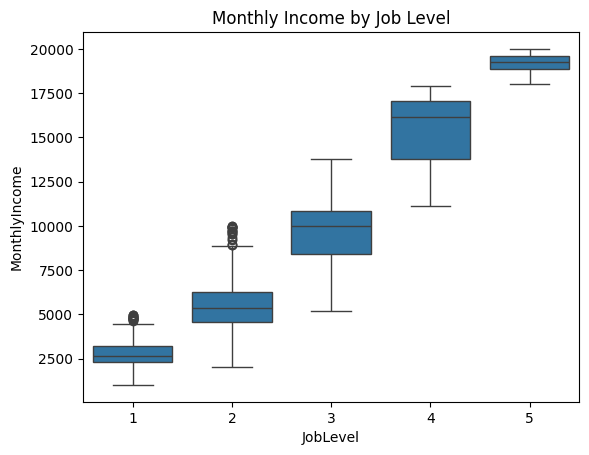

In [16]:
sns.boxplot(x="JobLevel", y="MonthlyIncome", data=att)
plt.title("Monthly Income by Job Level")
plt.show()

# Does age affetc attrition?

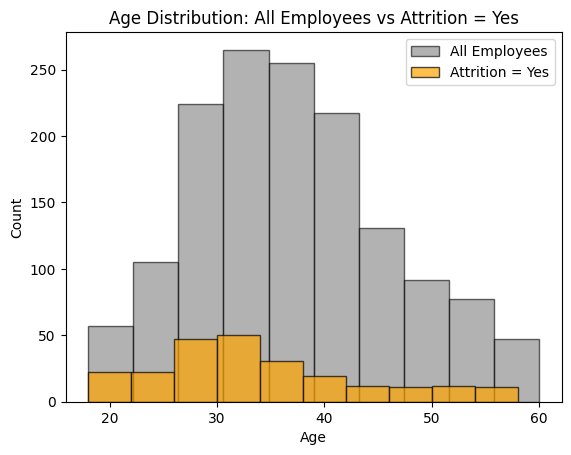

In [17]:
att["Age"].plot(kind="hist", bins=10, color="gray", edgecolor="black", alpha=0.6, label="All Employees")

att[att["Attrition"] == "Yes"]["Age"].plot(kind="hist", bins=10, color="orange", edgecolor="black", alpha=0.7, label="Attrition = Yes")

plt.title("Age Distribution: All Employees vs Attrition = Yes")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

Attrition is mostly in employees in their late 20s to early 30s and lower in employees aged 45 and above.

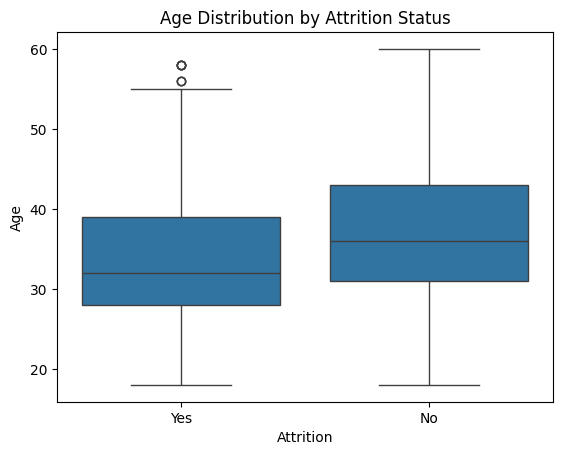

In [18]:
sns.boxplot(x="Attrition", y="Age", data=att)
plt.title("Age Distribution by Attrition Status")
plt.xlabel("Attrition")
plt.ylabel("Age")
plt.show()


Median age of those who left is significantly lower (33–35) than those who stayed (37–40).

The range of ages for attrition is also tighter, suggesting younger employees are more prone to leaving.

/tmp/ipython-input-1143234477.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_attr = att.groupby("AgeGroup")["Attrition"].value_counts(normalize=True).unstack()


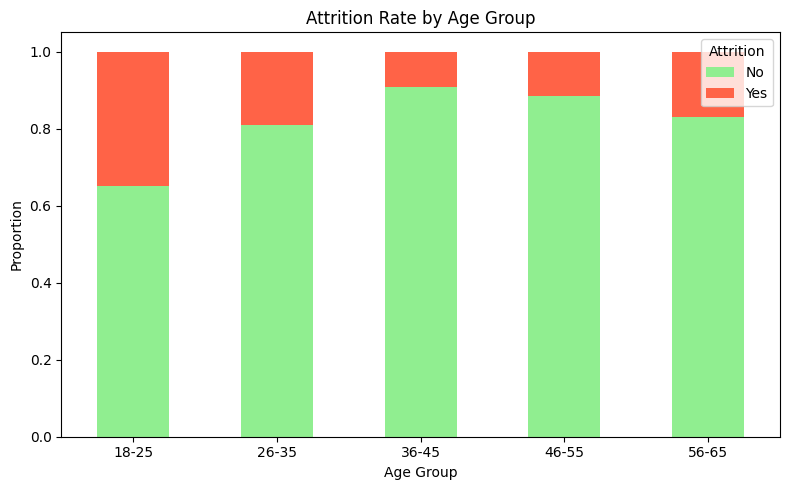

In [19]:
att["AgeGroup"] = pd.cut(att["Age"], bins=[18, 25, 35, 45, 55, 65], labels=["18-25", "26-35", "36-45", "46-55", "56-65"])

age_attr = att.groupby("AgeGroup")["Attrition"].value_counts(normalize=True).unstack()
age_attr.plot(kind="bar", stacked=True, color=["lightgreen", "tomato"], figsize=(8, 5))

plt.title("Attrition Rate by Age Group")
plt.ylabel("Proportion")
plt.xlabel("Age Group")
plt.legend(title="Attrition")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [20]:
age_attr = pd.crosstab(att["AgeGroup"], att["Attrition"], normalize="index") * 100

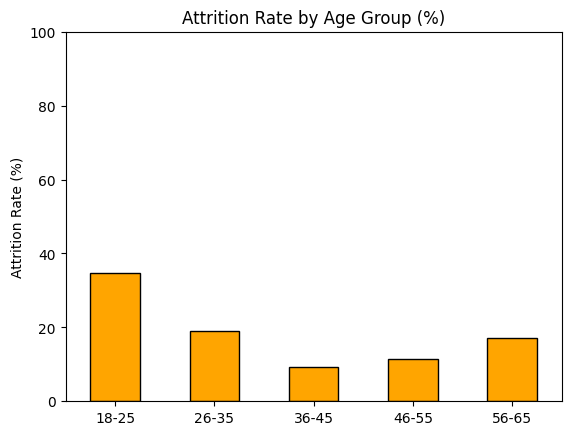

In [21]:
age_attr["Yes"].plot(kind="bar", color="orange", edgecolor="black")
plt.title("Attrition Rate by Age Group (%)")
plt.ylabel("Attrition Rate (%)")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.show()

- The 18–25 group has the highest attrition proportion - 40%

- Attrition decreases as age increases, particularly from 36 upward.

- Employees in the 36–45 and 46–55 age brackets have the lowest attrition rates, indicating higher stability or satisfaction in mid-to-late career stages.
- Increase in attrition for 56-65 may be due to retirement

# Does Age affect Attrition?
Yes, younger employees (especially under 35) are more likely to leave the company, suggesting that early-career employees may be facing unmet expectations in terms of growth, compensation, or engagement.

Efforts to improve onboarding, mentorship, and career advancement pathways for this group could reduce attrition.

# Does Job level affect Attrition?

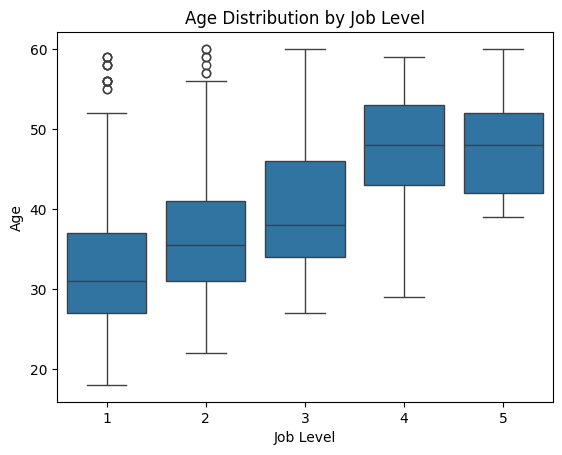

In [22]:
sns.boxplot(x="JobLevel", y="Age", data=att)
plt.title("Age Distribution by Job Level")
plt.xlabel("Job Level")
plt.ylabel("Age")
plt.show()

# Previously, we determined that monthly income is affected by job level and this plot shows that the younger employees are at lower job levels.

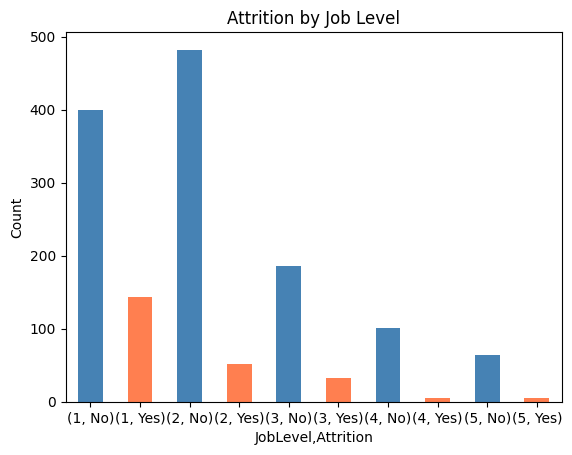

In [23]:
joblevel_att = att.groupby("JobLevel")["Attrition"].value_counts()
joblevel_att.plot(kind="bar", color=["steelblue", "coral"])
plt.title("Attrition by Job Level")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

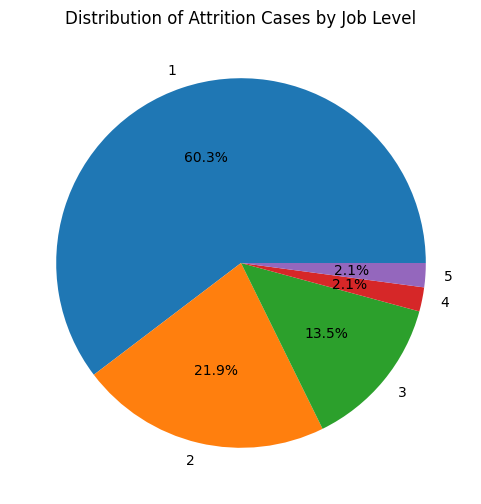

In [24]:
attr_yes = att[att["Attrition"] == "Yes"]

joblevel_pie = attr_yes["JobLevel"].value_counts().sort_index()

joblevel_pie.plot(kind="pie", autopct="%1.1f%%", figsize=(6,6))

plt.title("Distribution of Attrition Cases by Job Level")
plt.ylabel("")
plt.show()


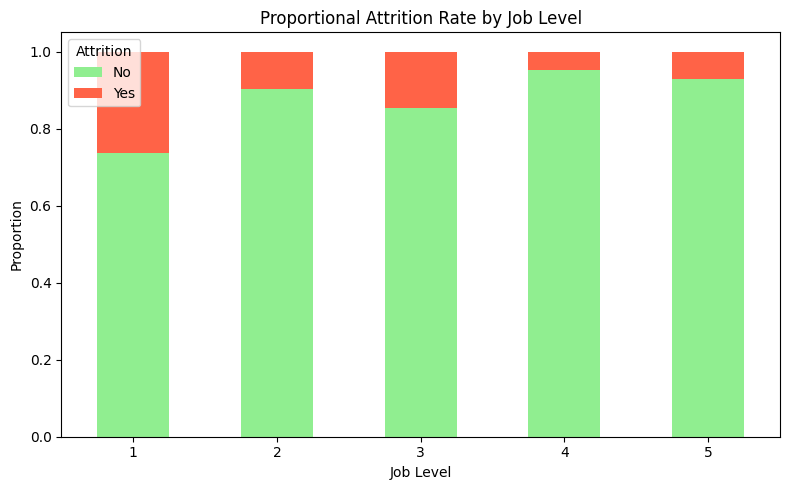

In [25]:
joblevel_prop = att.groupby("JobLevel")["Attrition"].value_counts(normalize=True).unstack()
joblevel_prop.plot(kind="bar", stacked=True, color=["lightgreen", "tomato"], figsize=(8, 5))

plt.title("Proportional Attrition Rate by Job Level")
plt.xlabel("Job Level")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.legend(title="Attrition")
plt.tight_layout()
plt.show()

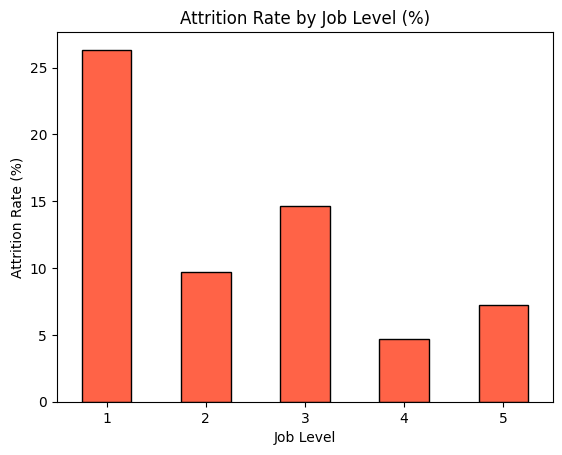

In [26]:
joblevel_attr = pd.crosstab(att["JobLevel"], att["Attrition"], normalize="index") * 100

joblevel_attr["Yes"].plot(kind="bar", color="tomato", edgecolor="black")
plt.title("Attrition Rate by Job Level (%)")
plt.xlabel("Job Level")
plt.ylabel("Attrition Rate (%)")
plt.xticks(rotation=0)
plt.show()


27% of attrition happens at Levels 1 followed by 15% at level 3 - perhaps due to stagnation.

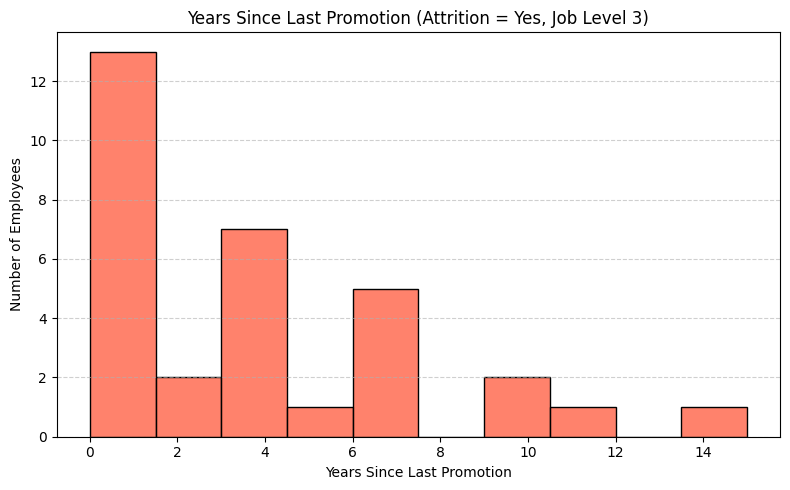

In [27]:
jl3_attr_yes = att[(att["JobLevel"] == 3) & (att["Attrition"] == "Yes")]

plt.figure(figsize=(8, 5))
sns.histplot(jl3_attr_yes["YearsSinceLastPromotion"], bins=10, color='tomato', edgecolor='black', alpha=0.8)

plt.title("Years Since Last Promotion (Attrition = Yes, Job Level 3)")
plt.xlabel("Years Since Last Promotion")
plt.ylabel("Number of Employees")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Attrition at lvl 3:
- 13 employees attrition happened very shortly after a promotion - may suggest that recent promotions did not lead to satisfaction.

- Notable spike is around 4–6 years with no promotion; employees waiting too long for advancement might become frustrated with perceived stagnation, leading to attrition.

# Explore if lack of promotion or managerial consistency contributes to attrition.

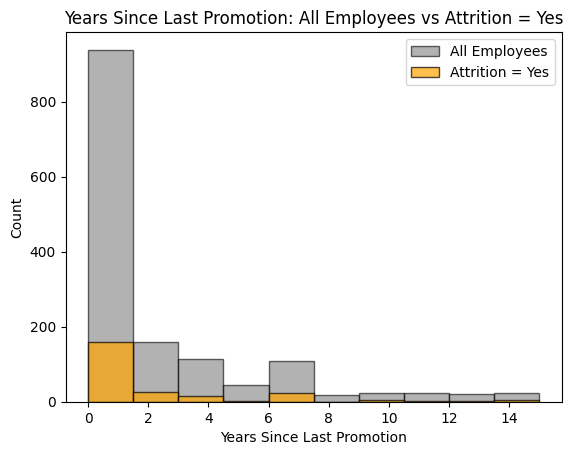

In [28]:
att["YearsSinceLastPromotion"].plot(kind="hist", bins=10, color="gray", edgecolor="black", alpha=0.6, label="All Employees")

att[att["Attrition"] == "Yes"]["YearsSinceLastPromotion"].plot(kind="hist", bins=10, color="orange", edgecolor="black", alpha=0.7, label="Attrition = Yes")

plt.title("Years Since Last Promotion: All Employees vs Attrition = Yes")
plt.xlabel("Years Since Last Promotion")
plt.ylabel("Count")
plt.legend()
plt.show()


Most employees had their last promotion within the last 0–2 years.

Employees who left are also mostly in the 0–2 year window, with a strong concentration at 0 years.

Attrition does not increase significantly with longer gaps in promotion. Many employees leave early after getting hired (0 years since promotion likely means they never got promoted).It may not be lack of career growth over years, but rather expectation mismatch or job dissatisfaction early on, organizational culture?

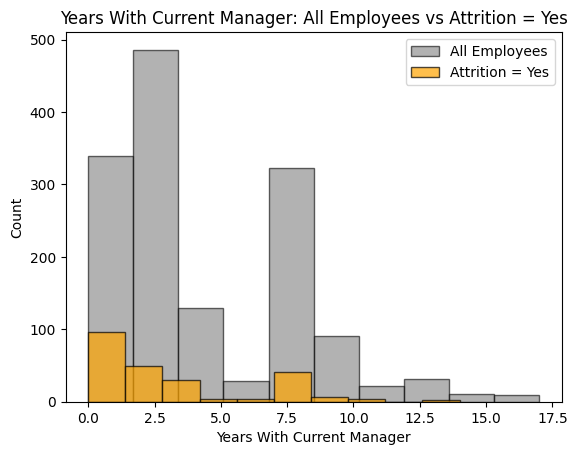

In [29]:
att["YearsWithCurrManager"].plot(kind="hist", bins=10, color="gray", edgecolor="black", alpha=0.6, label="All Employees")
att[att["Attrition"] == "Yes"]["YearsWithCurrManager"].plot(kind="hist", bins=10, color="orange", edgecolor="black", alpha=0.7, label="Attrition = Yes")

plt.title("Years With Current Manager: All Employees vs Attrition = Yes")
plt.xlabel("Years With Current Manager")
plt.ylabel("Count")
plt.legend()
plt.show()

Most employees have 0 to 3 years with their current managerand employees who left are heavily concentrated in those first 0–2 years.

Attrition drops off significantly after year 3, and almost no attrition occurs among those who've been with a manager for 7+ years.

This supports the idea that managerial consistency and early employee-manager relationships matter.

Employees seem more likely to leave when they are new to a team or manager, possibly due to poor onboarding, mismatch in leadership style, or lack of trust.

It may not be tenure alone, but rather instability or dissatisfaction early on in the employee-manager dynamic.

Employees who recently joined the company or recently got a new manager are more prone to attrition. Both "Years Since Last Promotion" and "Years With Current Manager" histograms show early exits dominate attrition patterns. This may reflect a lack of perceived growth or poor early engagement.

# To explore if lower job satisfaction scores are linked to attrition.


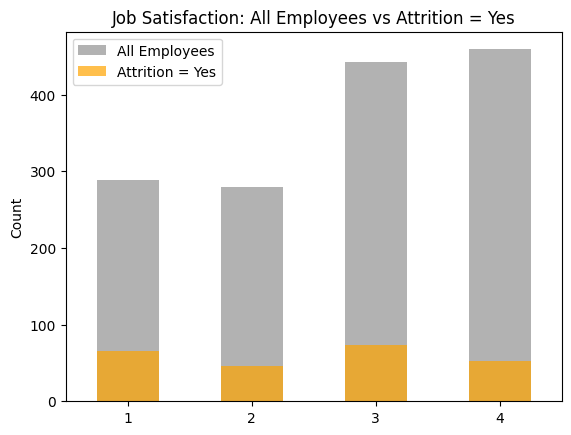

In [30]:
att["JobSatisfaction"].value_counts().sort_index().plot(kind='bar', alpha=0.6, color='gray', label='All Employees')
att[att["Attrition"] == "Yes"]["JobSatisfaction"].value_counts().sort_index().plot(kind='bar', alpha=0.7, color='orange', label='Attrition = Yes')

plt.title("Job Satisfaction: All Employees vs Attrition = Yes")
plt.xlabel("")
plt.ylabel("Count")
plt.legend()
plt.xticks(rotation = 0)
plt.show()

In [31]:
# Actual counts for each Job Satisfaction level
js_total = att["JobSatisfaction"].value_counts().sort_index()
js_attr = att[att["Attrition"] == "Yes"]["JobSatisfaction"].value_counts().sort_index()

js_summary = pd.DataFrame({
    "Total": js_total,
    "Attrition_Yes": js_attr,
    "Attrition_Rate (%)": round((js_attr / js_total) * 100, 2)
})

js_summary

,Total,Attrition_Yes,Attrition_Rate (%)
JobSatisfaction,,,
1,289,66,22.84
2,280,46,16.43
3,442,73,16.52
4,459,52,11.33


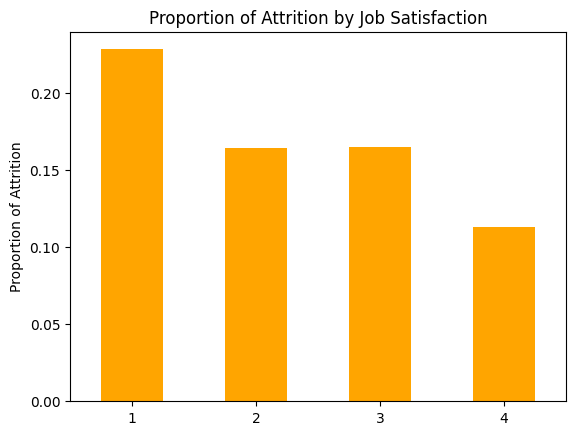

In [32]:
# For each level of Job Satisfaction, what proportion of people in that level left the company.
js_total = att["JobSatisfaction"].value_counts().sort_index()
js_attr = att[att["Attrition"] == "Yes"]["JobSatisfaction"].value_counts().sort_index()
js_prop = js_attr / js_total

js_prop.plot(kind="bar", color="orange")
plt.title("Proportion of Attrition by Job Satisfaction")
plt.xlabel("")
plt.ylabel("Proportion of Attrition")
plt.xticks(rotation = 0)
plt.show()

Risk of leaving is highest when Job Satisfaction is 1. Proportionally, satisfaction levels 2 and 3 are similar.

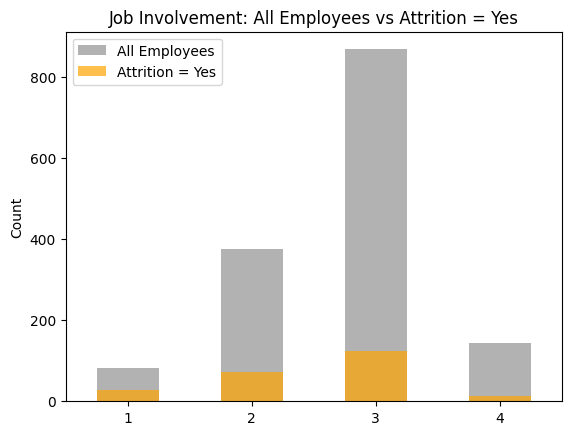

In [33]:
att["JobInvolvement"].value_counts().sort_index().plot(kind='bar', alpha=0.6, color='gray', label='All Employees')
att[att["Attrition"] == "Yes"]["JobInvolvement"].value_counts().sort_index().plot(kind='bar', alpha=0.7, color='orange', label='Attrition = Yes')

plt.title("Job Involvement: All Employees vs Attrition = Yes")
plt.xlabel("")
plt.ylabel("Count")
plt.legend()
plt.xticks(rotation = 0)
plt.show()

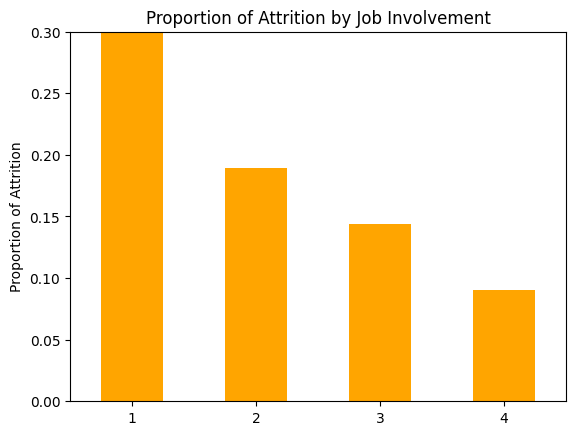

In [34]:
ji_total = att["JobInvolvement"].value_counts().sort_index()
ji_attr = att[att["Attrition"] == "Yes"]["JobInvolvement"].value_counts().sort_index()
ji_prop = ji_attr / ji_total

ji_prop.plot(kind="bar", color="orange")
plt.title("Proportion of Attrition by Job Involvement")
plt.xlabel("")
plt.ylabel("Proportion of Attrition")
plt.ylim(0, 0.3)
plt.xticks(rotation = 0)
plt.show()


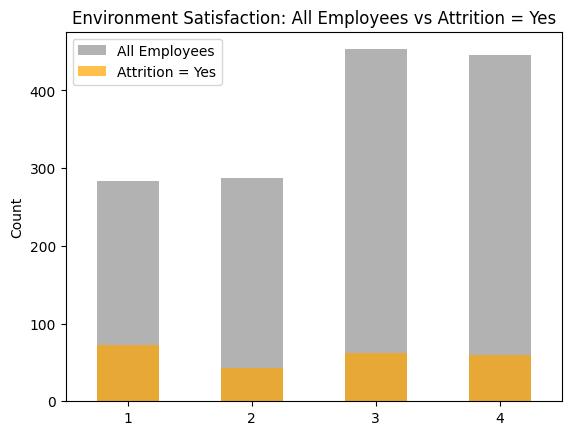

In [35]:
att["EnvironmentSatisfaction"].value_counts().sort_index().plot(
    kind='bar', alpha=0.6, color='gray', label='All Employees')

att[att["Attrition"] == "Yes"]["EnvironmentSatisfaction"].value_counts().sort_index().plot(
    kind='bar', alpha=0.7, color='orange', label='Attrition = Yes')

plt.title("Environment Satisfaction: All Employees vs Attrition = Yes")
plt.xlabel("")
plt.ylabel("Count")
plt.legend()
plt.xticks(rotation = 0)
plt.show()


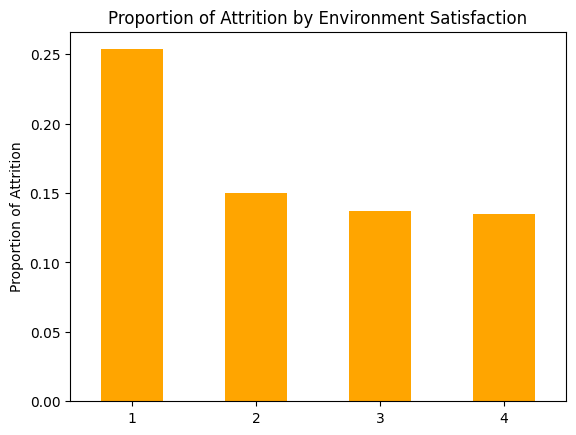

In [36]:
es_total = att["EnvironmentSatisfaction"].value_counts().sort_index()
es_attr = att[att["Attrition"] == "Yes"]["EnvironmentSatisfaction"].value_counts().sort_index()
es_prop = es_attr / es_total

es_prop.plot(kind="bar", color="orange")
plt.title("Proportion of Attrition by Environment Satisfaction")
plt.xlabel("")
plt.ylabel("Proportion of Attrition")
plt.xticks(rotation = 0)
plt.show()

Attrition is highest among those who reported lowest environment satisfaction (Level 1) — over 25%.

Attrition drops sharply from Level 1 to Level 2 and then stabilizes around 13–15% for Levels 2–4.

Even though Levels 3 and 4 have more employees overall, they are less likely to leave, relative to their population size.

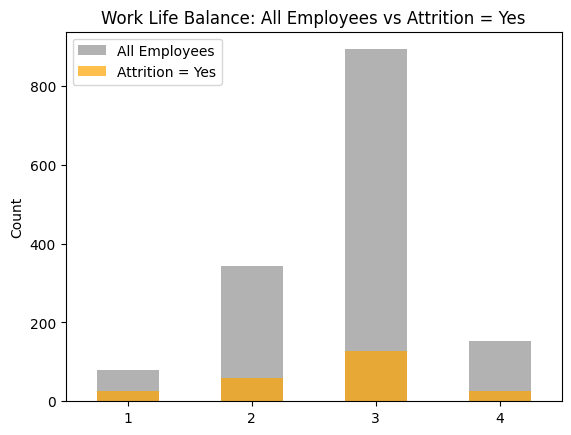

In [37]:
att["WorkLifeBalance"].value_counts().sort_index().plot(kind='bar', alpha=0.6, color='gray', label='All Employees')
att[att["Attrition"] == "Yes"]["WorkLifeBalance"].value_counts().sort_index().plot(kind='bar', alpha=0.7, color='orange', label='Attrition = Yes')

plt.title("Work Life Balance: All Employees vs Attrition = Yes")
plt.xlabel("")
plt.ylabel("Count")
plt.legend()
plt.xticks(rotation = 0)
plt.show()

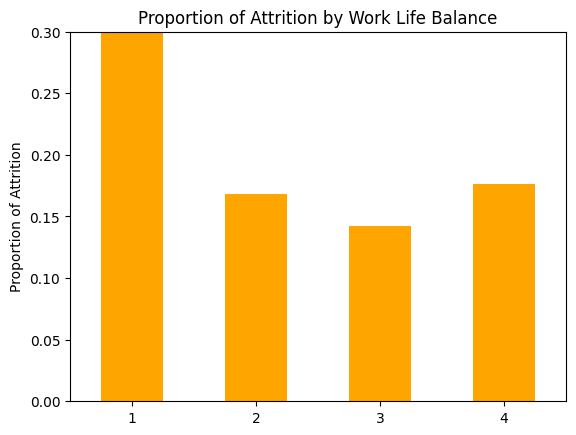

In [38]:
wlb_total = att["WorkLifeBalance"].value_counts().sort_index()
wlb_attr = att[att["Attrition"] == "Yes"]["WorkLifeBalance"].value_counts().sort_index()
wlb_prop = wlb_attr / wlb_total

wlb_prop.plot(kind="bar", color="orange")
plt.title("Proportion of Attrition by Work Life Balance")
plt.xlabel("")
plt.ylabel("Proportion of Attrition")
plt.ylim(0, 0.3)
plt.xticks(rotation = 0)
plt.show()

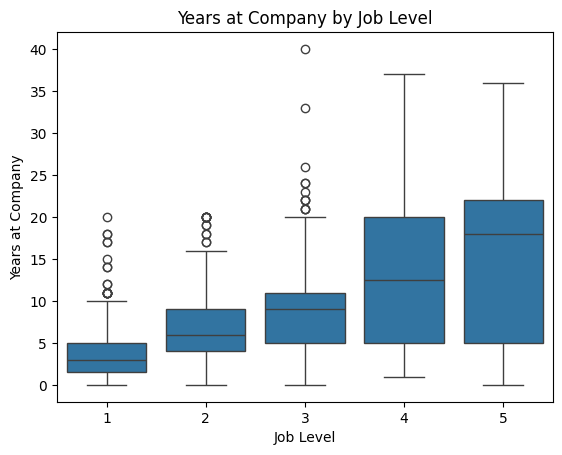

In [39]:
sns.boxplot(x="JobLevel", y="YearsAtCompany", data=att)
plt.title("Years at Company by Job Level")
plt.xlabel("Job Level")
plt.ylabel("Years at Company")
plt.show()

In [40]:
att1 = att["Attrition"].value_counts()
att1

,count
Attrition,
No,1233
Yes,237


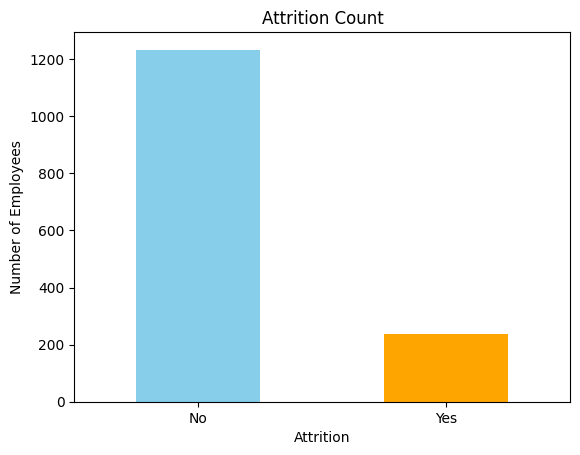

In [41]:
att1.plot(kind="bar", color=["skyblue", "orange"])
plt.title("Attrition Count")
plt.xlabel("Attrition")
plt.ylabel("Number of Employees")
plt.xticks(rotation=0)
plt.show()

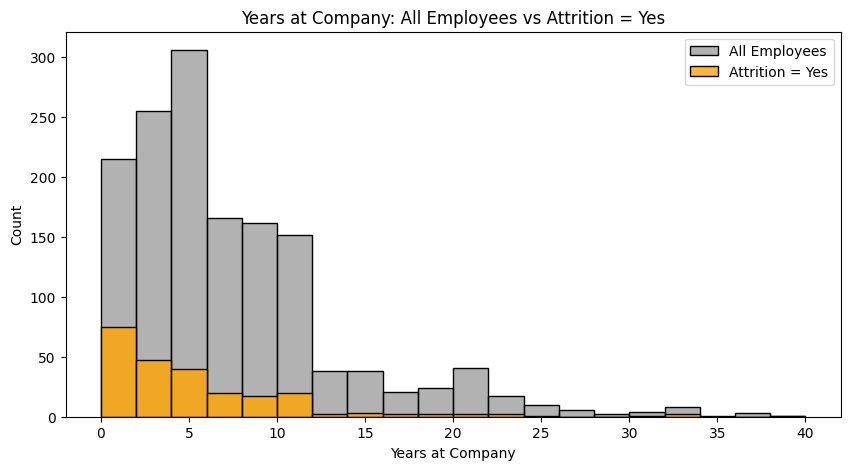

In [42]:
plt.figure(figsize=(10, 5))

sns.histplot(att['YearsAtCompany'], bins=20, kde=False, color='gray', label='All Employees', alpha=0.6)

sns.histplot(att[att['Attrition'] == 'Yes']['YearsAtCompany'], bins=20, kde=False, color='orange', label='Attrition = Yes', alpha=0.8)

plt.title("Years at Company: All Employees vs Attrition = Yes")
plt.xlabel("Years at Company")
plt.ylabel("Count")
plt.legend()
plt.show()

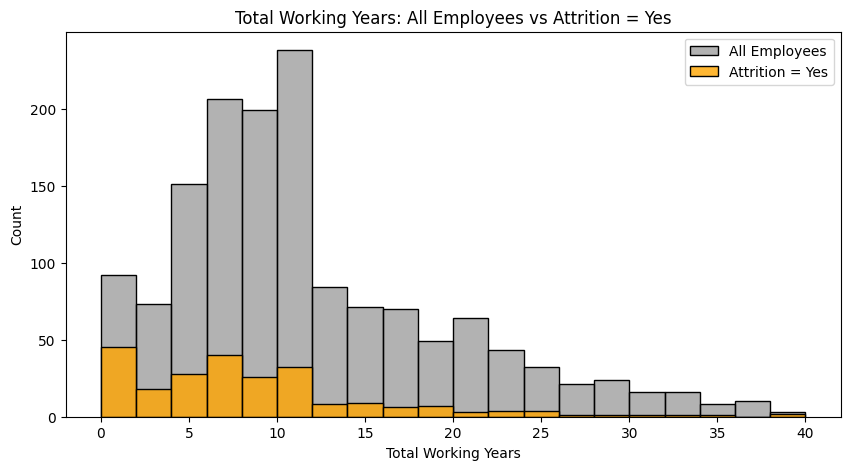

In [43]:
plt.figure(figsize=(10, 5))

sns.histplot(att['TotalWorkingYears'], bins=20, kde=False, color='gray', label='All Employees', alpha=0.6)

sns.histplot(att[att['Attrition'] == 'Yes']['TotalWorkingYears'], bins=20, kde=False, color='orange', label='Attrition = Yes', alpha=0.8)

plt.title("Total Working Years: All Employees vs Attrition = Yes")
plt.xlabel("Total Working Years")
plt.ylabel("Count")
plt.legend()
plt.show()


In [44]:
bins = [0, 2, 5, 10, att["YearsAtCompany"].max()]
labels = ["0-2 yrs", "3-5 yrs", "6-10 yrs", "11+ yrs"]
att["TenureGroup"] = pd.cut(att["YearsAtCompany"], bins=bins, labels=labels, right=True)

att["TenureGroup"].value_counts().sort_index()


,count
TenureGroup,
0-2 yrs,298
3-5 yrs,434
6-10 yrs,448
11+ yrs,246


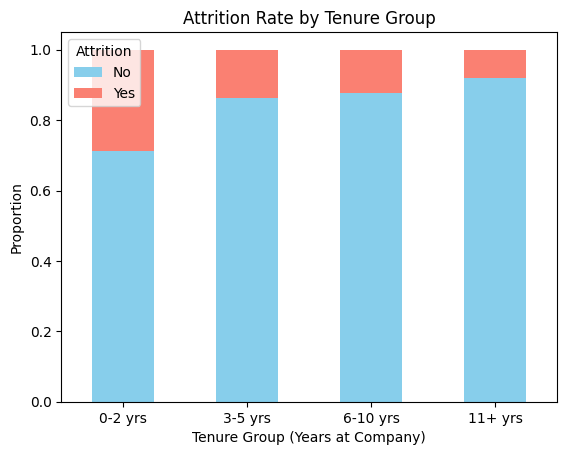

In [45]:
tenure_attr = pd.crosstab(att["TenureGroup"], att["Attrition"], normalize='index')

tenure_attr.plot(kind="bar", stacked=True, color=["skyblue", "salmon"])
plt.title("Attrition Rate by Tenure Group")
plt.ylabel("Proportion")
plt.xlabel("Tenure Group (Years at Company)")
plt.xticks(rotation=0)
plt.legend(title="Attrition")
plt.show()


Validates what we've previously seen - the younger ones in the company leave

In [46]:
bins_exp = [0, 2, 5, 10, 20, att["TotalWorkingYears"].max()]
labels_exp = ["0-2 yrs", "3-5 yrs", "6-10 yrs", "11-20 yrs", "21+ yrs"]
att["ExperienceGroup"] = pd.cut(att["TotalWorkingYears"], bins=bins_exp, labels=labels_exp, right=True)


att["ExperienceGroup"].value_counts().sort_index()

,count
ExperienceGroup,
0-2 yrs,112
3-5 yrs,193
6-10 yrs,607
11-20 yrs,340
21+ yrs,207


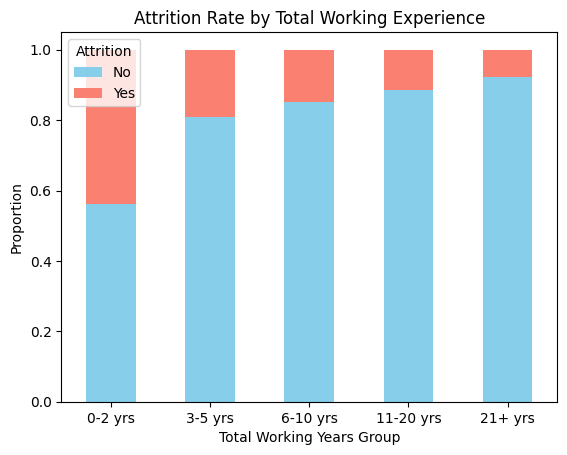

In [47]:
exp_attr = pd.crosstab(att["ExperienceGroup"], att["Attrition"], normalize='index')

exp_attr.plot(kind="bar", stacked=True, color=["skyblue", "salmon"])
plt.title("Attrition Rate by Total Working Experience")
plt.ylabel("Proportion")
plt.xlabel("Total Working Years Group")
plt.xticks(rotation=0)
plt.legend(title="Attrition")
plt.show()


In [48]:
bins_age = [18, 25, 35, 45, 55, 60]
labels_age = ["18-25", "26-35", "36-45", "46-55", "56-60"]
att["AgeGroup"] = pd.cut(att["Age"], bins=bins_age, labels=labels_age, right=True)

bins_exp = [0, 2, 5, 10, 20, att["TotalWorkingYears"].max()]
labels_exp = ["0-2 yrs", "3-5 yrs", "6-10 yrs", "11-20 yrs", "21+ yrs"]
att["ExperienceGroup"] = pd.cut(att["TotalWorkingYears"], bins=bins_exp, labels=labels_exp, right=True)


In [49]:
age_exp_attr = pd.crosstab(index=[att["AgeGroup"], att["ExperienceGroup"]],
                           columns=att["Attrition"],
                           normalize="index")

age_exp_attr.head()


Attrition                       No       Yes
AgeGroup ExperienceGroup                    
18-25    0-2 yrs          0.468085  0.531915
         3-5 yrs          0.829268  0.170732
         6-10 yrs         0.720000  0.280000
26-35    0-2 yrs          0.610169  0.389831
         3-5 yrs          0.800000  0.200000

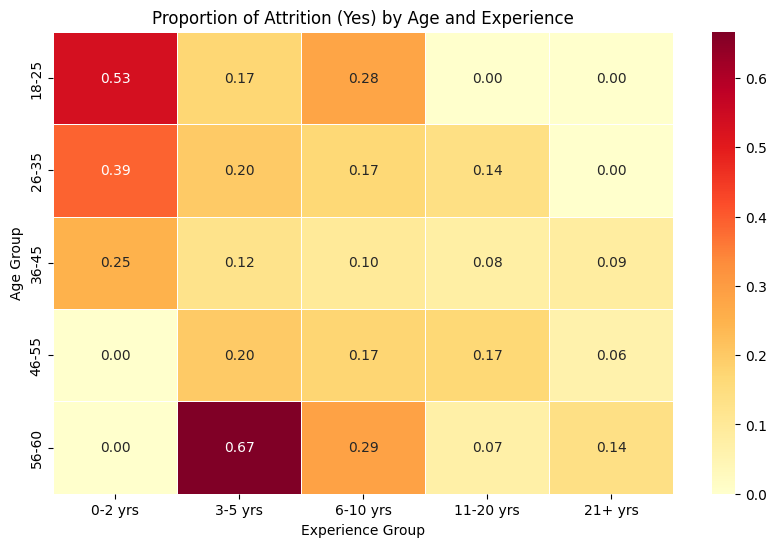

In [50]:
attr_yes = age_exp_attr["Yes"].unstack().fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(attr_yes, annot=True, cmap="YlOrRd", fmt=".2f", linewidths=0.5)
plt.title("Proportion of Attrition (Yes) by Age and Experience")
plt.ylabel("Age Group")
plt.xlabel("Experience Group")
plt.show()


Early-career exits are most common, especially for young employees (18–25) with little experience.

Attrition decreases with age and experience, suggesting stability increases over time.

Exception: High attrition among older employees with mid experience (56–60 & 3–5 yrs) — possibly due to retirement decisions or late-career transitions.

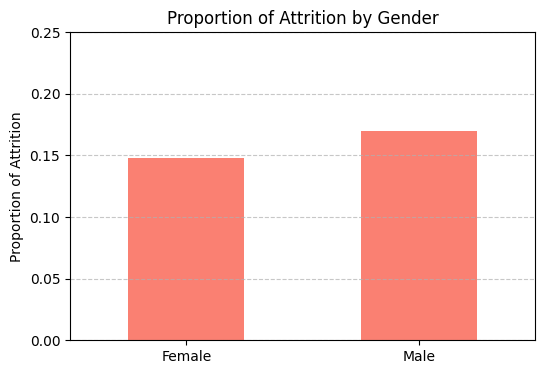

In [51]:
gender_total = att["Gender"].value_counts().sort_index()

gender_attr = att[att["Attrition"] == "Yes"]["Gender"].value_counts().sort_index()

gender_prop = gender_attr / gender_total

gender_prop.plot(kind="bar", color=["salmon"], figsize=(6,4))
plt.title("Proportion of Attrition by Gender")
plt.ylabel("Proportion of Attrition")
plt.xlabel("")
plt.ylim(0, 0.25)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


While the difference is not huge, male employees have a slightly higher attrition rate than female employees.

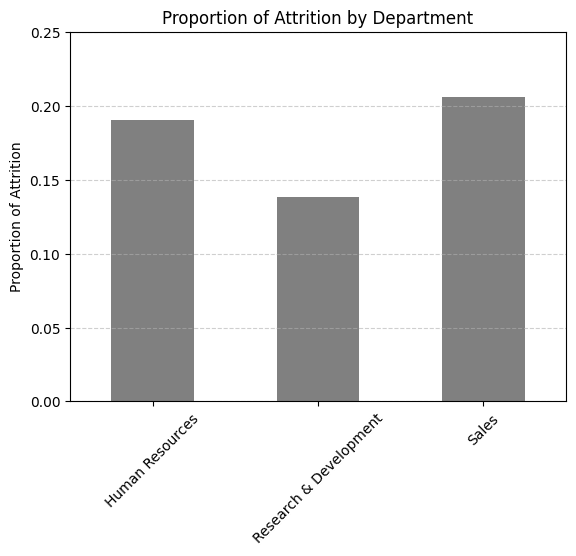

In [52]:
dept_total = att["Department"].value_counts().sort_index()

dept_attr = att[att["Attrition"] == "Yes"]["Department"].value_counts().sort_index()

dept_prop = dept_attr / dept_total

dept_prop.plot(kind="bar", color="gray")
plt.title("Proportion of Attrition by Department")
plt.ylabel("Proportion of Attrition")
plt.xlabel("")
plt.ylim(0, 0.25)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


- Sales has the highest attrition rate, slightly above 20%, suggesting potential dissatisfaction or instability in the Sales department. May require further investigation into workload, compensation, or work environment.

- Human Resources has the second highest attrition rate, around 19%. Indicates notable turnover, which is surprising since HR typically manages employee engagement.

- Research & Development (R&D) has the lowest attrition rate, around 14% suggesting better employee retention, possibly due to more fulfilling work, better alignment with roles, or stable leadership.

Focus retention strategies on Sales and HR departments.

- Exit interviews to understand dissatisfaction.

- Role-specific surveys to assess workload or support.

- Compensation benchmarking.

- R&D may serve as a model for best practices in retaining employees.

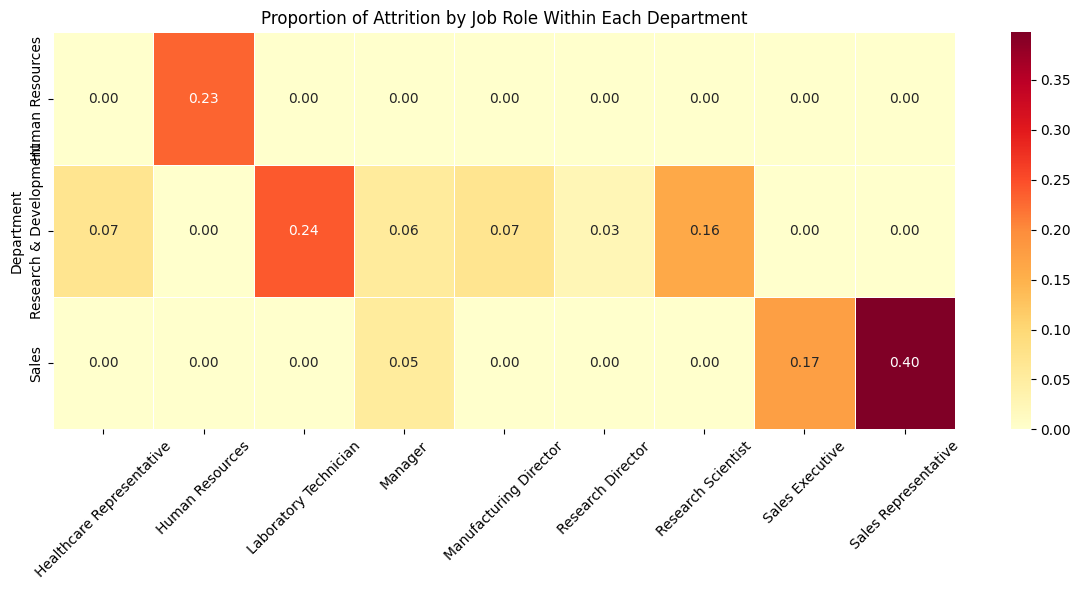

In [53]:
dept_role_total = att.groupby(["Department", "JobRole"]).size()
dept_role_attr = att[att["Attrition"] == "Yes"].groupby(["Department", "JobRole"]).size()

dept_role_prop = (dept_role_attr / dept_role_total).unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(dept_role_prop, annot=True, fmt=".2f", cmap="YlOrRd", linewidths=0.5)
plt.title("Proportion of Attrition by Job Role Within Each Department")
plt.xlabel("")
plt.ylabel("Department")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Sales Representative has the highest attrition rate at 0.40.
- Laboratory Technician shows 0.24 attrition.

- Human Resources role has a 0.23 attrition rate. This might indicate internal dissatisfaction even among HR professionals.

/tmp/ipython-input-3270338826.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_roles, x="JobRole", y="Age", palette="Set2")


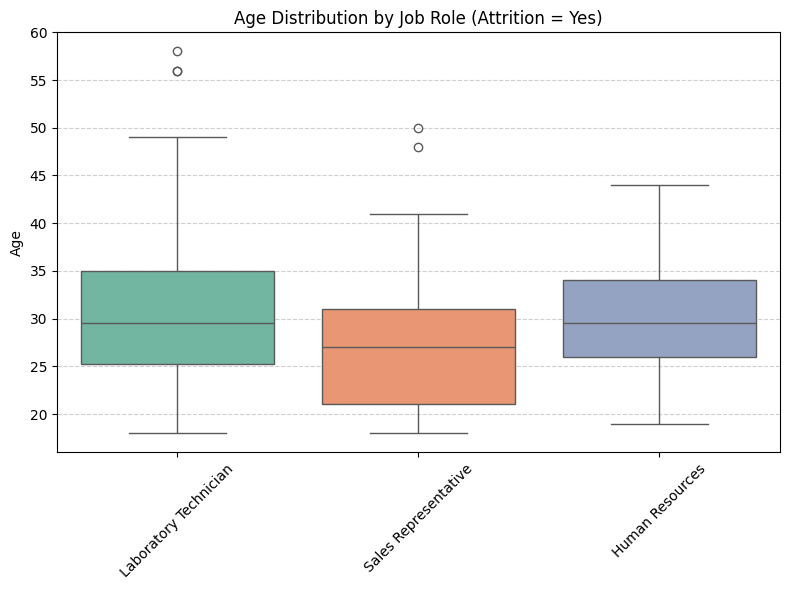

In [54]:
filtered_roles = att[
    (att["Attrition"] == "Yes") &
    (att["JobRole"].isin(["Sales Representative", "Laboratory Technician", "Human Resources"]))]

plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_roles, x="JobRole", y="Age", palette="Set2")

plt.title("Age Distribution by Job Role (Attrition = Yes)")
plt.xlabel("")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

All three roles show employee attrition is more frequent among younger staff (20s–30s).

Sales Reps tend to be the youngest leavers overall.

Laboratory Technicians have the widest age spread, implying diverse age-related reasons for leaving.

HR leavers fall in the mid-range, with fewer very young or very old employees.

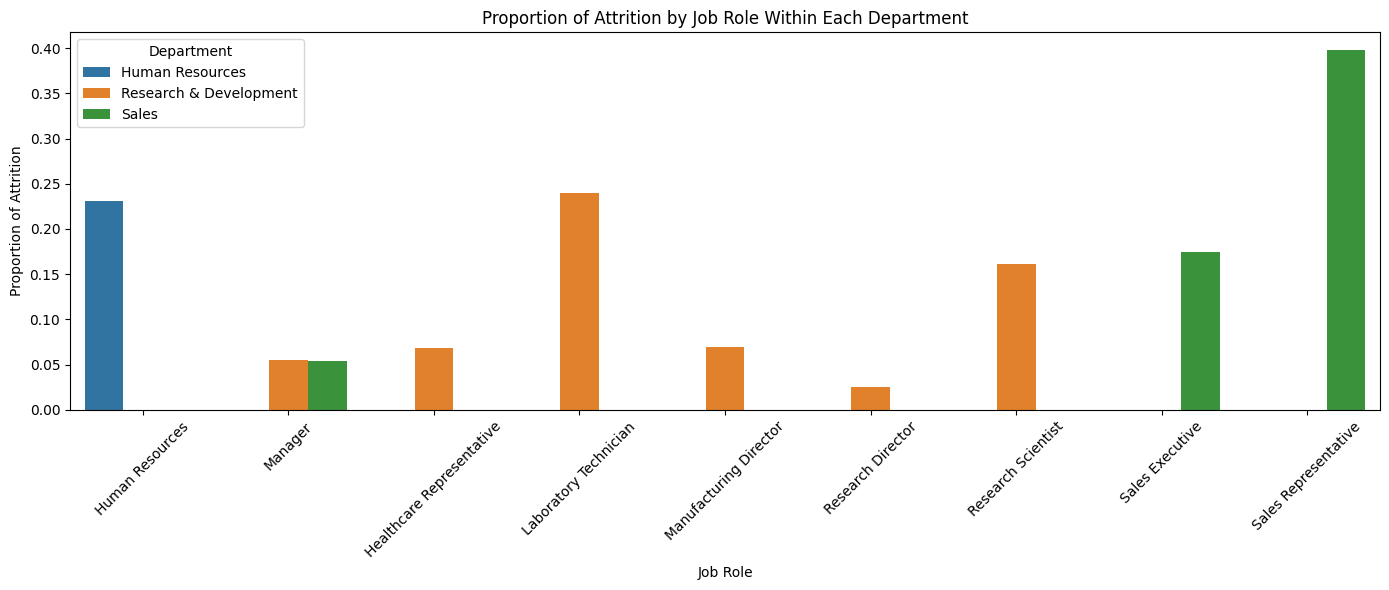

In [55]:
dept_role_total = att.groupby(["Department", "JobRole"]).size()
dept_role_attr = att[att["Attrition"] == "Yes"].groupby(["Department", "JobRole"]).size()

dept_role_prop = (dept_role_attr / dept_role_total).fillna(0).reset_index(name="AttritionProportion")

plt.figure(figsize=(14, 6))
sns.barplot(data=dept_role_prop, x="JobRole", y="AttritionProportion", hue="Department")
plt.title("Proportion of Attrition by Job Role Within Each Department")
plt.ylabel("Proportion of Attrition")
plt.xlabel("Job Role")
plt.xticks(rotation=45)
plt.legend(title="Department")
plt.tight_layout()
plt.show()


In [56]:
att_num = att.select_dtypes("number")
correlation = round(att_num.corr(), 2)
correlation

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.00,0.01,-0.00,0.21,0.01,0.02,0.03,0.51,-0.00,0.50,...,0.00,0.05,0.04,0.68,-0.02,-0.02,0.31,0.21,0.22,0.20
DailyRate,0.01,1.00,-0.00,-0.02,0.02,0.02,0.05,0.00,0.03,0.01,...,0.00,0.01,0.04,0.01,0.00,-0.04,-0.03,0.01,-0.03,-0.03
DistanceFromHome,-0.00,-0.00,1.00,0.02,-0.02,0.03,0.01,0.01,-0.00,-0.02,...,0.03,0.01,0.04,0.00,-0.04,-0.03,0.01,0.02,0.01,0.01
Education,0.21,-0.02,0.02,1.00,-0.03,0.02,0.04,0.10,-0.01,0.09,...,-0.02,-0.01,0.02,0.15,-0.03,0.01,0.07,0.06,0.05,0.07
EnvironmentSatisfaction,0.01,0.02,-0.02,-0.03,1.00,-0.05,-0.01,0.00,-0.01,-0.01,...,-0.03,0.01,0.00,-0.00,-0.02,0.03,0.00,0.02,0.02,-0.00
HourlyRate,0.02,0.02,0.03,0.02,-0.05,1.00,0.04,-0.03,-0.07,-0.02,...,-0.00,0.00,0.05,-0.00,-0.01,-0.00,-0.02,-0.02,-0.03,-0.02
JobInvolvement,0.03,0.05,0.01,0.04,-0.01,0.04,1.00,-0.01,-0.02,-0.02,...,-0.03,0.03,0.02,-0.01,-0.02,-0.01,-0.02,0.01,-0.02,0.03
JobLevel,0.51,0.00,0.01,0.10,0.00,-0.03,-0.01,1.00,-0.00,0.95,...,-0.02,0.02,0.01,0.78,-0.02,0.04,0.53,0.39,0.35,0.38
JobSatisfaction,-0.00,0.03,-0.00,-0.01,-0.01,-0.07,-0.02,-0.00,1.00,-0.01,...,0.00,-0.01,0.01,-0.02,-0.01,-0.02,-0.00,-0.00,-0.02,-0.03
MonthlyIncome,0.50,0.01,-0.02,0.09,-0.01,-0.02,-0.02,0.95,-0.01,1.00,...,-0.02,0.03,0.01,0.77,-0.02,0.03,0.51,0.36,0.34,0.34


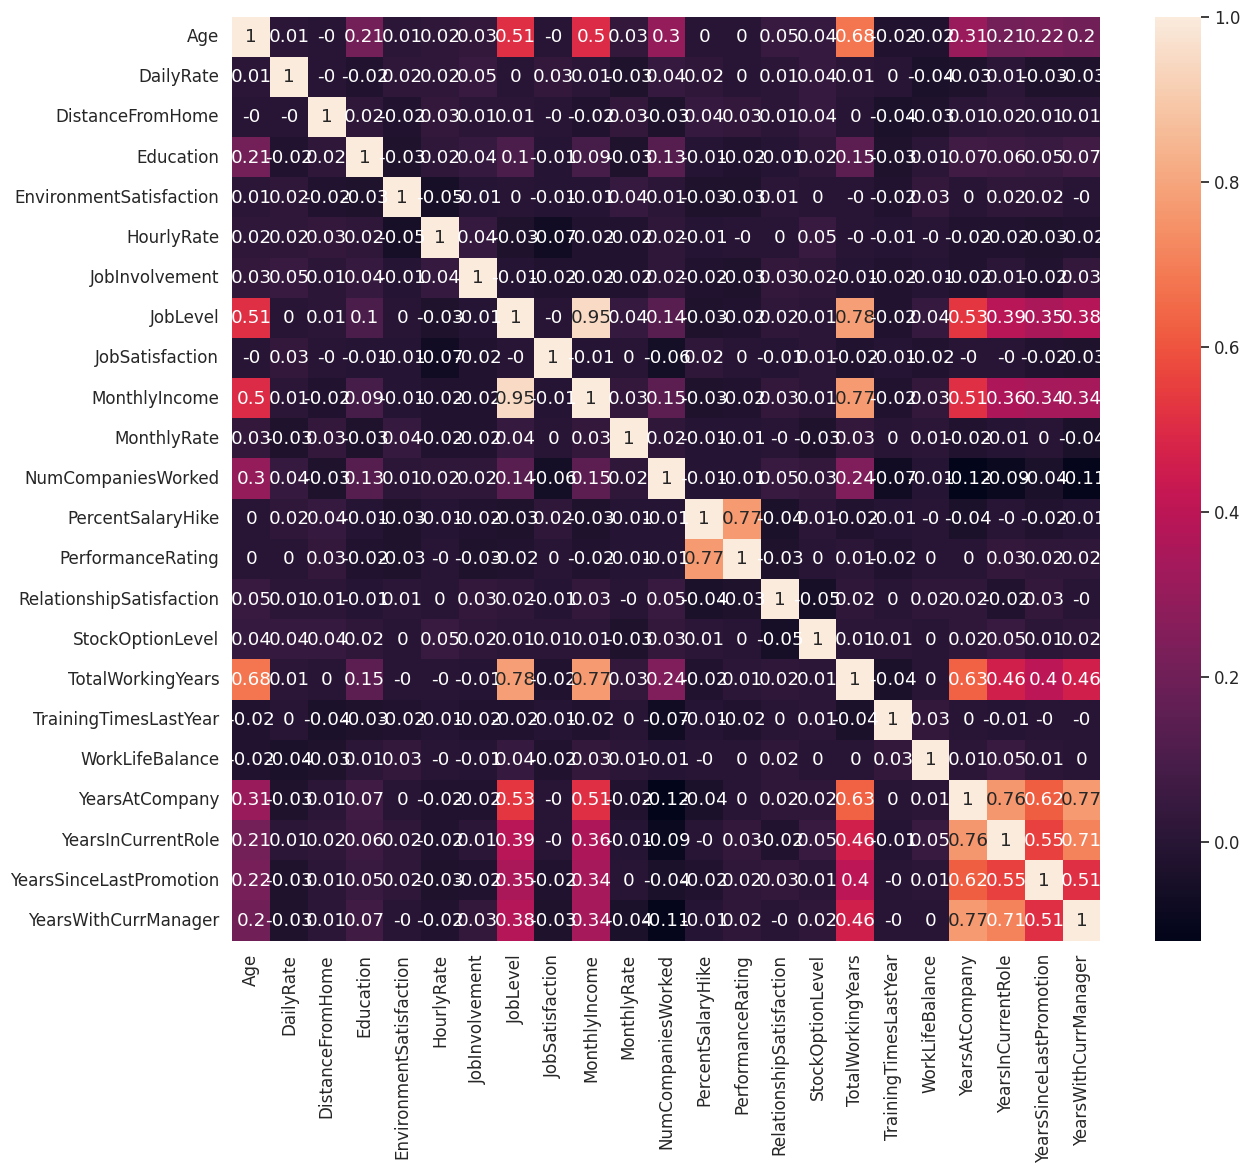

In [57]:

plt.figure(figsize=(14, 12))
sns.set(font_scale=1.1)

sns.heatmap(correlation, annot = True)
plt.show()

In [58]:
att["AttritionBinary"] = att["Attrition"].map({"Yes": 1, "No": 0})

In [59]:
att_num2 = att.select_dtypes("number")
corr2 = round(att_num2.corr(), 2)
corr2

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AttritionBinary
Age,1.00,0.01,-0.00,0.21,0.01,0.02,0.03,0.51,-0.00,0.50,...,0.05,0.04,0.68,-0.02,-0.02,0.31,0.21,0.22,0.20,-0.16
DailyRate,0.01,1.00,-0.00,-0.02,0.02,0.02,0.05,0.00,0.03,0.01,...,0.01,0.04,0.01,0.00,-0.04,-0.03,0.01,-0.03,-0.03,-0.06
DistanceFromHome,-0.00,-0.00,1.00,0.02,-0.02,0.03,0.01,0.01,-0.00,-0.02,...,0.01,0.04,0.00,-0.04,-0.03,0.01,0.02,0.01,0.01,0.08
Education,0.21,-0.02,0.02,1.00,-0.03,0.02,0.04,0.10,-0.01,0.09,...,-0.01,0.02,0.15,-0.03,0.01,0.07,0.06,0.05,0.07,-0.03
EnvironmentSatisfaction,0.01,0.02,-0.02,-0.03,1.00,-0.05,-0.01,0.00,-0.01,-0.01,...,0.01,0.00,-0.00,-0.02,0.03,0.00,0.02,0.02,-0.00,-0.10
HourlyRate,0.02,0.02,0.03,0.02,-0.05,1.00,0.04,-0.03,-0.07,-0.02,...,0.00,0.05,-0.00,-0.01,-0.00,-0.02,-0.02,-0.03,-0.02,-0.01
JobInvolvement,0.03,0.05,0.01,0.04,-0.01,0.04,1.00,-0.01,-0.02,-0.02,...,0.03,0.02,-0.01,-0.02,-0.01,-0.02,0.01,-0.02,0.03,-0.13
JobLevel,0.51,0.00,0.01,0.10,0.00,-0.03,-0.01,1.00,-0.00,0.95,...,0.02,0.01,0.78,-0.02,0.04,0.53,0.39,0.35,0.38,-0.17
JobSatisfaction,-0.00,0.03,-0.00,-0.01,-0.01,-0.07,-0.02,-0.00,1.00,-0.01,...,-0.01,0.01,-0.02,-0.01,-0.02,-0.00,-0.00,-0.02,-0.03,-0.10
MonthlyIncome,0.50,0.01,-0.02,0.09,-0.01,-0.02,-0.02,0.95,-0.01,1.00,...,0.03,0.01,0.77,-0.02,0.03,0.51,0.36,0.34,0.34,-0.16


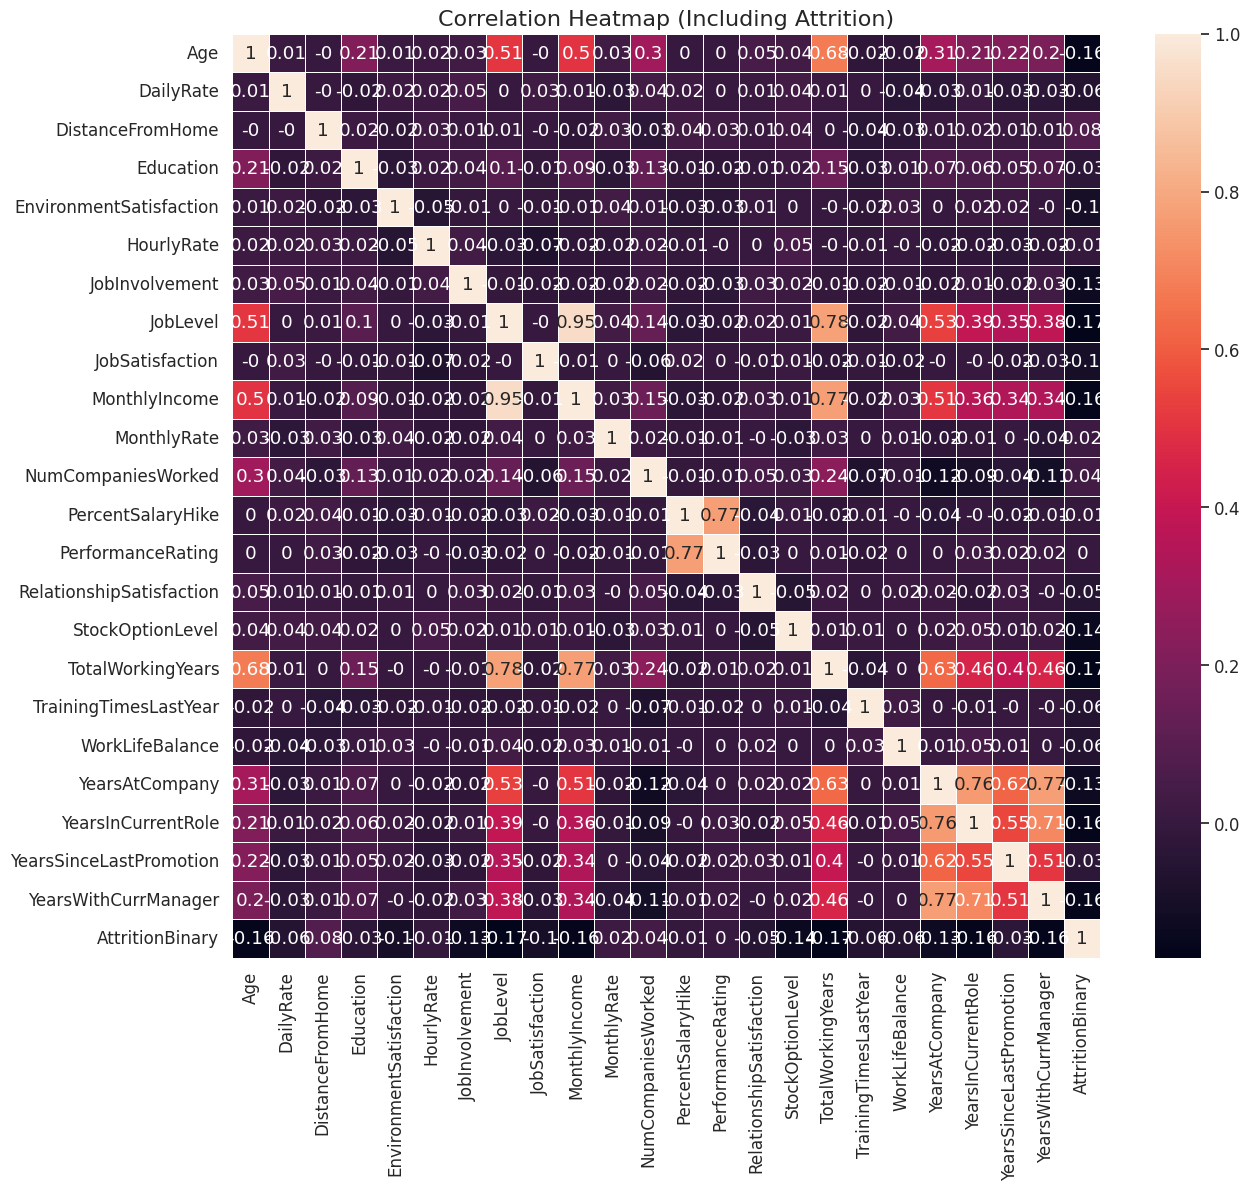

In [60]:
plt.figure(figsize=(14, 12))
sns.heatmap(corr2, annot=True, linewidths=0.5)
plt.title("Correlation Heatmap (Including Attrition)", fontsize=16)
plt.show()

In [61]:
corr2.to_excel("correlation_matrix.xlsx", index=True)

Age, job level, salary, performance rating, total working years, years at company, years in current role, years since last promotion, and years with current manager are all weakly negatively correlation with Attrition - the lower of these variables, the increases attrition indicating that attrition is likely driven by a combination of factors rather than a single variable.

In [62]:
summary = att.pivot_table(index="BusinessTravel",values="AttritionBinary",aggfunc=[len, np.mean])

summary.columns = ['Count','Yes']
summary['% All'] = summary['Count'] / len(att) * 100
summary['% Yes'] = summary['Yes'] * 100
summary['% No']  = 100 - summary['% Yes']
summary = round(summary[['Count','% All','% No','% Yes']], 2)
summary

/tmp/ipython-input-2166126883.py:1: FutureWarning: The provided callable <function mean at 0x788bfab2ed40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  summary = att.pivot_table(index="BusinessTravel",values="AttritionBinary",aggfunc=[len, np.mean])


,Count,% All,% No,% Yes
BusinessTravel,,,,
Non-Travel,150,10.20,92.00,8.00
Travel_Frequently,277,18.84,75.09,24.91
Travel_Rarely,1043,70.95,85.04,14.96


In [63]:
bt_counts = att.pivot_table(index="JobRole",columns="BusinessTravel",values="AttritionBinary",aggfunc=len)

bt_pct = bt_counts.div(bt_counts.sum(axis=1), axis=0).mul(100).round(1)
bt_summary = bt_counts.join(bt_pct, rsuffix="_Pct").sort_index()

bt_summary

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely,Non-Travel_Pct,Travel_Frequently_Pct,Travel_Rarely_Pct
JobRole,,,,,,
Healthcare Representative,15,26,90,11.5,19.8,68.7
Human Resources,4,10,38,7.7,19.2,73.1
Laboratory Technician,28,51,180,10.8,19.7,69.5
Manager,12,13,77,11.8,12.7,75.5
Manufacturing Director,13,29,103,9.0,20.0,71.0
Research Director,6,12,62,7.5,15.0,77.5
Research Scientist,28,54,210,9.6,18.5,71.9
Sales Executive,39,59,228,12.0,18.1,69.9
Sales Representative,5,23,55,6.0,27.7,66.3


Those travelling have 25% attrition rate compared to 8% for non-travellers. And Sales Rep has the highest of about 28% travel compared to others.

In [64]:
summary = att.pivot_table(index="Department",values="AttritionBinary",aggfunc=[len, np.mean])

summary.columns = ['Count','Yes']
summary['% All'] = summary['Count'] / len(att) * 100
summary['% Yes'] = summary['Yes'] * 100
summary['% No']  = 100 - summary['% Yes']
summary = round(summary[['Count','% All','% No','% Yes']], 2)
summary

/tmp/ipython-input-3252706420.py:1: FutureWarning: The provided callable <function mean at 0x788bfab2ed40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  summary = att.pivot_table(index="Department",values="AttritionBinary",aggfunc=[len, np.mean])


,Count,% All,% No,% Yes
Department,,,,
Human Resources,63,4.29,80.95,19.05
Research & Development,961,65.37,86.16,13.84
Sales,446,30.34,79.37,20.63


Sales and HR have about 20% of attrition each

In [65]:
summary = att.pivot_table(index="EducationField",values="AttritionBinary",aggfunc=[len, np.mean])

summary.columns = ['Count','Yes']
summary['% All'] = summary['Count'] / len(att) * 100
summary['% Yes'] = summary['Yes'] * 100
summary['% No']  = 100 - summary['% Yes']
summary = round(summary[['Count','% All','% No','% Yes']], 2)
summary

/tmp/ipython-input-4156525153.py:1: FutureWarning: The provided callable <function mean at 0x788bfab2ed40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  summary = att.pivot_table(index="EducationField",values="AttritionBinary",aggfunc=[len, np.mean])


,Count,% All,% No,% Yes
EducationField,,,,
Human Resources,27,1.84,74.07,25.93
Life Sciences,606,41.22,85.31,14.69
Marketing,159,10.82,77.99,22.01
Medical,464,31.56,86.42,13.58
Other,82,5.58,86.59,13.41
Technical Degree,132,8.98,75.76,24.24


HR, Marketing and Technical degrees have high attrition compared to others.

In [66]:
summary = att.pivot_table(index="Gender",values="AttritionBinary",aggfunc=[len, np.mean])

summary.columns = ['Count','Yes']
summary['% All'] = summary['Count'] / len(att) * 100
summary['% Yes'] = summary['Yes'] * 100
summary['% No']  = 100 - summary['% Yes']
summary = round(summary[['Count','% All','% No','% Yes']], 2)
summary

/tmp/ipython-input-683015052.py:1: FutureWarning: The provided callable <function mean at 0x788bfab2ed40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  summary = att.pivot_table(index="Gender",values="AttritionBinary",aggfunc=[len, np.mean])


,Count,% All,% No,% Yes
Gender,,,,
Female,588,40.0,85.20,14.80
Male,882,60.0,82.99,17.01


Male attrition is slighly more

In [67]:
summary = att.pivot_table(index="JobRole",values="AttritionBinary",aggfunc=[len, np.mean])

summary.columns = ['Count','Yes']
summary['% All'] = summary['Count'] / len(att) * 100
summary['% Yes'] = summary['Yes'] * 100
summary['% No']  = 100 - summary['% Yes']
summary = round(summary[['Count','% All','% No','% Yes']], 2)
summary

/tmp/ipython-input-2667682956.py:1: FutureWarning: The provided callable <function mean at 0x788bfab2ed40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  summary = att.pivot_table(index="JobRole",values="AttritionBinary",aggfunc=[len, np.mean])


,Count,% All,% No,% Yes
JobRole,,,,
Healthcare Representative,131,8.91,93.13,6.87
Human Resources,52,3.54,76.92,23.08
Laboratory Technician,259,17.62,76.06,23.94
Manager,102,6.94,95.10,4.90
Manufacturing Director,145,9.86,93.10,6.90
Research Director,80,5.44,97.50,2.50
Research Scientist,292,19.86,83.90,16.10
Sales Executive,326,22.18,82.52,17.48
Sales Representative,83,5.65,60.24,39.76


HR and Lab Tech have about 24% attrition while Sakes Rep have almost 40% attrition.

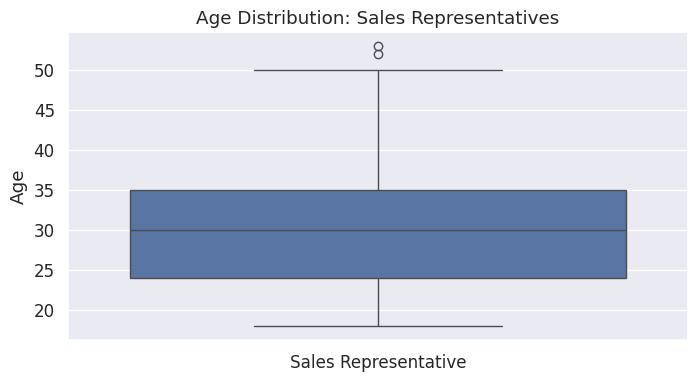

,Age
count,83.0
mean,30.4
std,8.5
min,18.0
25%,24.0
50%,30.0
75%,35.0
max,53.0


In [68]:
plt.figure(figsize=(8,4))
sns.boxplot(x="JobRole", y="Age", data=att[att["JobRole"] == "Sales Representative"])
plt.title("Age Distribution: Sales Representatives")
plt.xlabel("")
plt.show()

att.loc[att["JobRole"] == "Sales Representative", "Age"].describe().round(1)

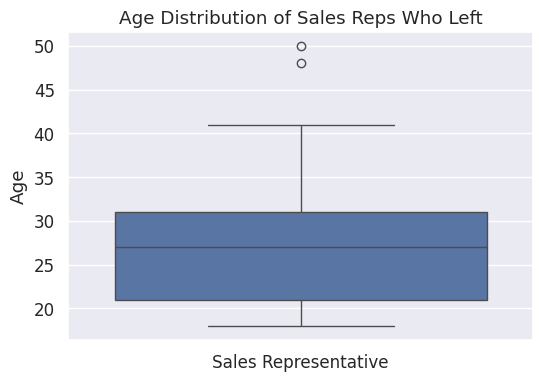

count    33.0
mean     27.8
std       8.2
min      18.0
25%      21.0
50%      27.0
75%      31.0
max      50.0
Name: Age, dtype: float64


In [69]:
sales_left = att[(att["JobRole"] == "Sales Representative") &(att["Attrition"] == "Yes")]

plt.figure(figsize=(6,4))
sns.boxplot(x="JobRole", y="Age", data=sales_left)
plt.title("Age Distribution of Sales Reps Who Left")
plt.xlabel("")
plt.show()

print(sales_left["Age"].describe().round(1))

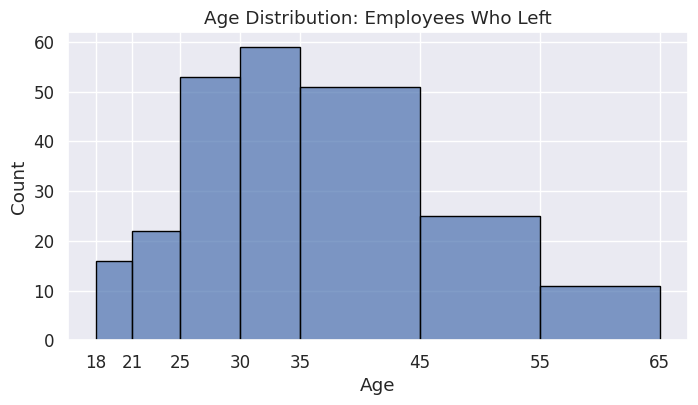

count    237.0
mean      33.6
std        9.7
min       18.0
25%       28.0
50%       32.0
75%       39.0
max       58.0
Name: Age, dtype: float64


In [70]:
left = att[att["Attrition"] == "Yes"]

plt.figure(figsize=(8,4))
sns.histplot(left["Age"], bins=[18,21,25,30,35,45,55,65],
             edgecolor="black", stat="count", alpha=0.7)
plt.title("Age Distribution: Employees Who Left")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks([18,21,25,30,35,45,55,65])
plt.show()

print(left["Age"].describe().round(1))

In [71]:
summary = att.pivot_table(index="MaritalStatus",values="AttritionBinary",aggfunc=[len, np.mean])

summary.columns = ['Count','Yes']
summary['% All'] = summary['Count'] / len(att) * 100
summary['% Yes'] = summary['Yes'] * 100
summary['% No']  = 100 - summary['% Yes']
summary = round(summary[['Count','% All','% No','% Yes']], 2)
summary

/tmp/ipython-input-384443574.py:1: FutureWarning: The provided callable <function mean at 0x788bfab2ed40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  summary = att.pivot_table(index="MaritalStatus",values="AttritionBinary",aggfunc=[len, np.mean])


,Count,% All,% No,% Yes
MaritalStatus,,,,
Divorced,327,22.24,89.91,10.09
Married,673,45.78,87.52,12.48
Single,470,31.97,74.47,25.53


High attrition for single employees at 26%

In [72]:
summary = att.pivot_table(index="OverTime",values="AttritionBinary",aggfunc=[len, np.mean])

summary.columns = ['Count','Yes']
summary['% All'] = summary['Count'] / len(att) * 100
summary['% Yes'] = summary['Yes'] * 100
summary['% No']  = 100 - summary['% Yes']
summary = round(summary[['Count','% All','% No','% Yes']], 2)
summary

/tmp/ipython-input-3651123532.py:1: FutureWarning: The provided callable <function mean at 0x788bfab2ed40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  summary = att.pivot_table(index="OverTime",values="AttritionBinary",aggfunc=[len, np.mean])


,Count,% All,% No,% Yes
OverTime,,,,
No,1054,71.7,89.56,10.44
Yes,416,28.3,69.47,30.53


Employees who worked overtime had 31% attrition compared to 10% attrition for those who didn't

In [73]:
ot_counts = att.pivot_table(index="JobRole",columns="OverTime",values="AttritionBinary", aggfunc=len,)
ot_pct = ot_counts.div(ot_counts.sum(axis=1), axis=0).mul(100).round(1)

ot_summary = ot_counts.join(ot_pct, rsuffix="_Pct").sort_index()
ot_summary

OverTime,No,Yes,No_Pct,Yes_Pct
JobRole,,,,
Healthcare Representative,94,37,71.8,28.2
Human Resources,39,13,75.0,25.0
Laboratory Technician,197,62,76.1,23.9
Manager,75,27,73.5,26.5
Manufacturing Director,106,39,73.1,26.9
Research Director,57,23,71.2,28.7
Research Scientist,195,97,66.8,33.2
Sales Executive,232,94,71.2,28.8
Sales Representative,59,24,71.1,28.9


 The split hovers around 70/30 almost everywhere, so no one role does more overtime.

# **Step 3: Problem Solving and Insight Generation**
Based on my analysis, below are my top five attrition drivers:
*   **Age and Tenure**: Employees under 25 leave at 40% of attrition, more than twice the baseline rate of 16%. And, those with less than 2 years at the company churn at about 30%. hence, early career exit is the single biggest risk factor. New hires are not getting the clarity, training, or immersion they need in their first months possibly due to inadequate onboarding/mentorship or lack of quick, visible career pathways.

*   **Role and Department Risks**: Sales Reps had the highest attrition of about 40%. With age ranging from 24–32 years and 28% travel compared to other job roles, this job role has a combination of two of the highest risk of attrition working against it. Sales quotas, commission structures, and role pressure are not aligned with the support and rewards reps expect. Aggressive targets/commission/bonus structures that feel unattainable or unfair. HR and Lab technicians also see about 25% attrition, which may be as a result of mismatch between role expectations and rewards/job satisfaction.

*   **Workload & Travel**: Overtime workers quit at 30.5% compared to 10% for non-overtime employees. Frequent travellers churn at about 25% compared to 8% of non-travellers. Excess hours and frequent trips overwhelm work–life balance, leading to stress and disengagement.No formal caps or compensation for overtime and inadequate recovery time or wellness support after travel may be the drivers of this risk factor.

*   **Promotion & Manager Relationship**: Employees who have never been promoted—or who have ≤ 2 years under their current manager leave disproportionately. Employees who never see a clear promotion path or do not bond quickly with their managers feel stalled and undervalued or the managers are not equipped for early-stage coaching and feedback.

*   **Satisfaction & Work-Life Balance**: Low JobSatisfaction/WorkLifeBalance scores correlate with 20–30 % attrition. Underlying cultural or process issues (poor internal communication, unbalanced workloads, missing perks) drive both low survey scores and eventual turnover. Lack of flexible work policies to boost work-life harmony, imbalance in task allocation or unclear role boundaries may be drivers of this risk factor.

**Recommendations**
1. Early‑Career Exits: Create a 90‑day onboarding program with weekly check ins and assign each new hire a mentor for their first six months to have a structured Onboarding & Mentorship program.

2. High‑Risk Roles (Sales, HR, Lab Tech): Conduct targeted surveys within these job roles with the aim to redesign quotas and commission tiers for early, attainable wins, and identify other areas affecting job satisfaction, so as to match tasks with expectations. Fund targeted training or certifications to boost job satisfaction.

3. Workload & Travel: Cap overtime at 10 hours/week and compensate excess hours with time off or stipends. Limit travel to a maximum of X trips per quarter per employee. Lastly, offer recovery days and a travel wellness allowance after each trip.

4. Promotion & Manager Relationships: Train managers on early stage feedback techniques. Require 30, 60, and 90-day one‑on‑one check ins for all new reports.

5. Satisfaction & Work‑Life Balance: Check employee pulse through quarterly surveys on workload, recognition, and culture. Offer flexible start/end work day times.


Next Steps:
- Pilot Programs: Test each initiative with a small cohort (e.g., new hires in Sales) for 3 months.
- Measure Impact: Track attrition and engagement monthly in pilot vs. control groups.
- Gather Feedback: Conduct brief “stay interviews” to refine and scale successful pilots.